# Lending Club - Loan Default

Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

**If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.**

 

**In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.**

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("loan.csv",low_memory=False)

## Data Preprocessing

###   Missing Value Handling

In [4]:
df_na = pd.DataFrame(df.isna().sum()*100/len(df),columns=["PercentageNA"])
df_na.reset_index(inplace=True,drop=False)
df_na.rename(columns={"index":"Column"},inplace=True)

# Deleting columns that have missing value more than 50% of the total 
for idx in df_na.index:
    if df_na.loc[idx,"PercentageNA"] > 50:
        del df[df_na.loc[idx,"Column"]]

In [5]:
df_na=df_na[(df_na["PercentageNA"] != 0) & (df_na["PercentageNA"] < 50) ]

In [6]:
#Checking Other Missing Values if they can be handled
df_na.sort_values("PercentageNA",ascending=False,inplace=True)
df_na

Column  PercentageNA
19                         desc     32.580507
10                    emp_title      6.191303
11                   emp_length      2.706650
105        pub_rec_bankruptcies      1.754916
45                 last_pymnt_d      0.178765
49   collections_12_mths_ex_med      0.140998
78     chargeoff_within_12_mths      0.140998
33                   revol_util      0.125891
106                   tax_liens      0.098195
21                        title      0.027696
48           last_credit_pull_d      0.005036

### Checking the Columns with Missing Values less than 50%`

In [7]:
## column : desc
print("Total Records in Data :{} \nTotal Unique Value for desc Column : {}".format(len(df),len(pd.unique(df["desc"]))))

Total Records in Data :39717 
Total Unique Value for desc Column : 26528


In [8]:
# Dropping Desc column  as the unique values are high in proportaion and will not add much information
del df["desc"]

In [9]:
## column: emp_title
print("Total Records in Data :{} \nTotal Unique Value for desc Column : {}".format(len(df),len(pd.unique(df["emp_title"]))))

Total Records in Data :39717 
Total Unique Value for desc Column : 28821


In [10]:
# Dropping emp_title column  as the unique values are high in proportaion and will not add much information
del df["emp_title"]

In [11]:
df.drop(["id","member_id","title","url"],axis=1,inplace=True)

In [12]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status pymnt_plan         purpose zip_code addr_state    dti  \
0  Dec-11   Fully Paid          n     credit_card    860xx         AZ  27.65   
1  Dec-11  Charged Off          n             car    309xx         GA   1.00   
2  Dec-11   Fully Paid          n  small_business    606xx         IL   8.72   
3  Dec-11   Fully Paid          n           other    917xx         CA  20.00   
4  Dec-11      Current          n           other    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           171.62             May-16                         0.0   
1           119.66             Sep-13                         0.0   
2           649.91             May-16                         0.0   
3           357.48             Apr-16                         0.0   
4            67.79             May-16                         0.0   

   policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  \
0            1       INDIVIDUAL               0                       0.0   
1            1       INDIVIDUAL               0                       0.0   
2            1       INDIVIDUAL               0                       0.0   
3            1       INDIVIDUAL               0          

In [13]:
df=df[df["loan_status"] != "Current"]

## Visualization

###  Percentage Distribution of Loan

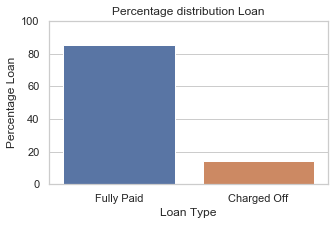

In [41]:
plt.figure(figsize=(5,3))
loan_status_dist = (df["loan_status"].value_counts()*100/df["loan_status"].count())
sns.barplot(loan_status_dist.index,loan_status_dist.values)
plt.ylim(0,100)
plt.ylabel("Percentage Loan")
plt.xlabel("Loan Type")
plt.title("Percentage distribution Loan")
plt.show()

### Loan Term and Default Rate

In [64]:
loan_term = df[["term","loan_status"]].groupby(["term","loan_status"]).size()
loan_term = pd.DataFrame(loan_term.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
loan_term.reset_index(inplace=True,drop=False)

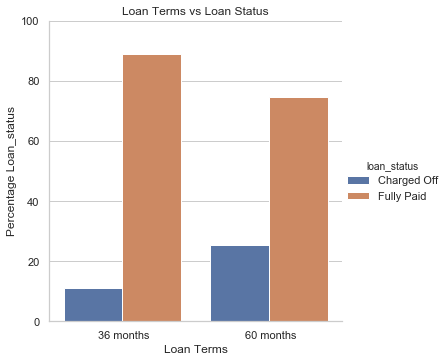

In [71]:
sns.catplot(x="term",y="Values",data=loan_term,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Loan Terms")
plt.title("Loan Terms vs Loan Status")
plt.show()

### Loan Grade and Default Rate

In [74]:
loan_grade = df[["grade","loan_status"]].groupby(["grade","loan_status"]).size()
loan_grade = pd.DataFrame(loan_grade.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
loan_grade.reset_index(inplace=True,drop=False)

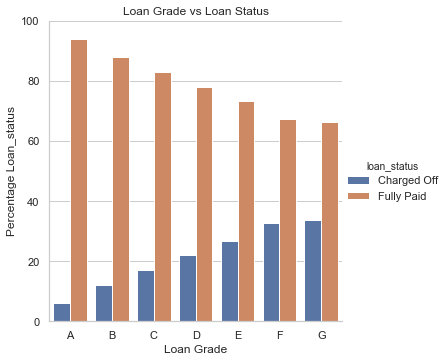

In [77]:
sns.catplot(x="grade",y="Values",data=loan_grade,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Loan Grade")
plt.title("Loan Grade vs Loan Status")
plt.show()

***Loan Default Rate increases as the Grade of Loan decreses form A to G***

### Employment_Lenght vs Loan Default

In [82]:
df["emp_length"].isna().sum() # count of Missing Values in emp_lenght

1033

In [116]:
df["emp_length"]=df["emp_length"].apply(lambda x: str(x).replace("years","year"))
emp_length = df[["emp_length","loan_status"]].groupby(["emp_length","loan_status"]).size()
emp_length = pd.DataFrame(emp_length.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
emp_length.reset_index(inplace=True,drop=False)

<Figure size 720x360 with 0 Axes>

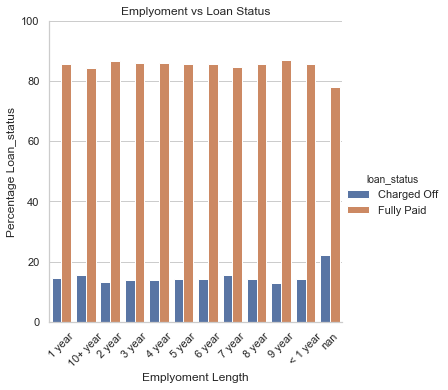

In [117]:
plt.figure(figsize=(10,5))
sns.catplot(x="emp_length",y="Values",data=emp_length,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Emplyoment Length")
plt.title("Emplyoment vs Loan Status")
plt.xticks(rotation=45)
plt.show()

***Emoloyment length doesnt have much effect on the default rate. It is seen that the default rate is more within the group 
of applicatants who either dont declare employment length***

### Home Ownership Vs Loan Status

In [118]:
pd.unique(df["home_ownership"])

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [119]:
home_ownership = df[["home_ownership","loan_status"]].groupby(["home_ownership","loan_status"]).size()
home_ownership = pd.DataFrame(home_ownership.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
home_ownership.reset_index(inplace=True,drop=False)

<Figure size 720x360 with 0 Axes>

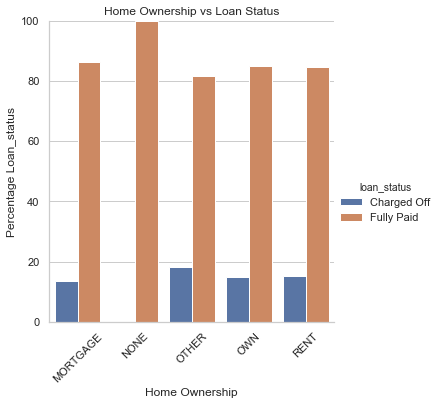

In [120]:
plt.figure(figsize=(10,5))
sns.catplot(x="home_ownership",y="Values",data=home_ownership,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Home Ownership")
plt.title("Home Ownership vs Loan Status")
plt.xticks(rotation=45)
plt.show()

***Loan Applicatants having home_ownership type as others have a marginally higher rate of Default***

### Loan Purpose Vs Loan Default

In [121]:
pd.unique(df["purpose"])

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [122]:
purpose = df[["purpose","loan_status"]].groupby(["purpose","loan_status"]).size()
purpose = pd.DataFrame(purpose.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
purpose.reset_index(inplace=True,drop=False)

<Figure size 1440x360 with 0 Axes>

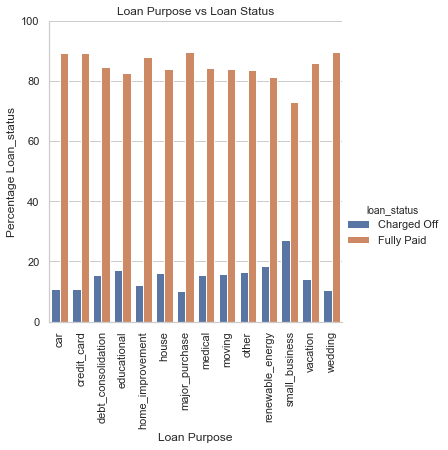

In [123]:
plt.figure(figsize=(20,5))
sns.catplot(x="purpose",y="Values",data=purpose,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Loan Purpose")
plt.title("Loan Purpose vs Loan Status")
plt.xticks(rotation=90)
plt.show()

###  Verification Status and Loan Default

In [137]:
pd.unique(df["verification_status"])

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [139]:
verification = df[["verification_status","loan_status"]].groupby(["verification_status","loan_status"]).size()
verification = pd.DataFrame(verification.groupby(level=0).apply(lambda x:100 * x / float(x.sum())),columns=["Values"])
verification.reset_index(inplace=True,drop=False)

<Figure size 1440x360 with 0 Axes>

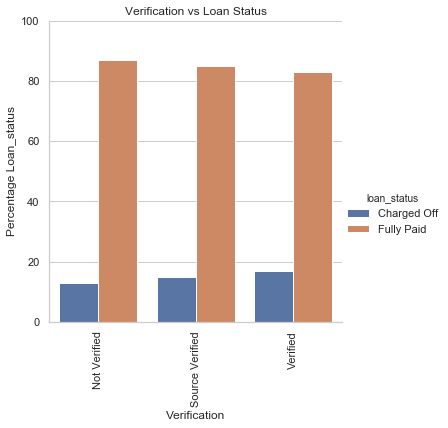

In [142]:
plt.figure(figsize=(20,5))
sns.catplot(x="verification_status",y="Values",data=verification,hue="loan_status",kind="bar")
plt.ylim(0,100)
plt.ylabel("Percentage Loan_status")
plt.xlabel("Verification")
plt.title("Verification vs Loan Status")
plt.xticks(rotation=90)
plt.show()